In [ ]:
#CONNECTING FILE TO DRIVE TO EXRTACT AND SAVE DATA AND MODELS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image1


Image Shape:  (1080, 1920, 3)
Centroid = (1405,704)
Centroid = (1840,92)




Image2


Image Shape:  (1080, 1920, 3)
Centroid = (1405,705)
Centroid = (1840,92)




Image3


Image Shape:  (1080, 1920, 3)
Centroid = (1810,706)
Centroid = (828,675)
Centroid = (1814,84)




Image4


Image Shape:  (1080, 1920, 3)
Centroid = (1212,722)




Image5


Image Shape:  (1080, 1920, 3)
Centroid = (1211,731)




Image6


Image Shape:  (1080, 1920, 3)
Centroid = (1211,732)






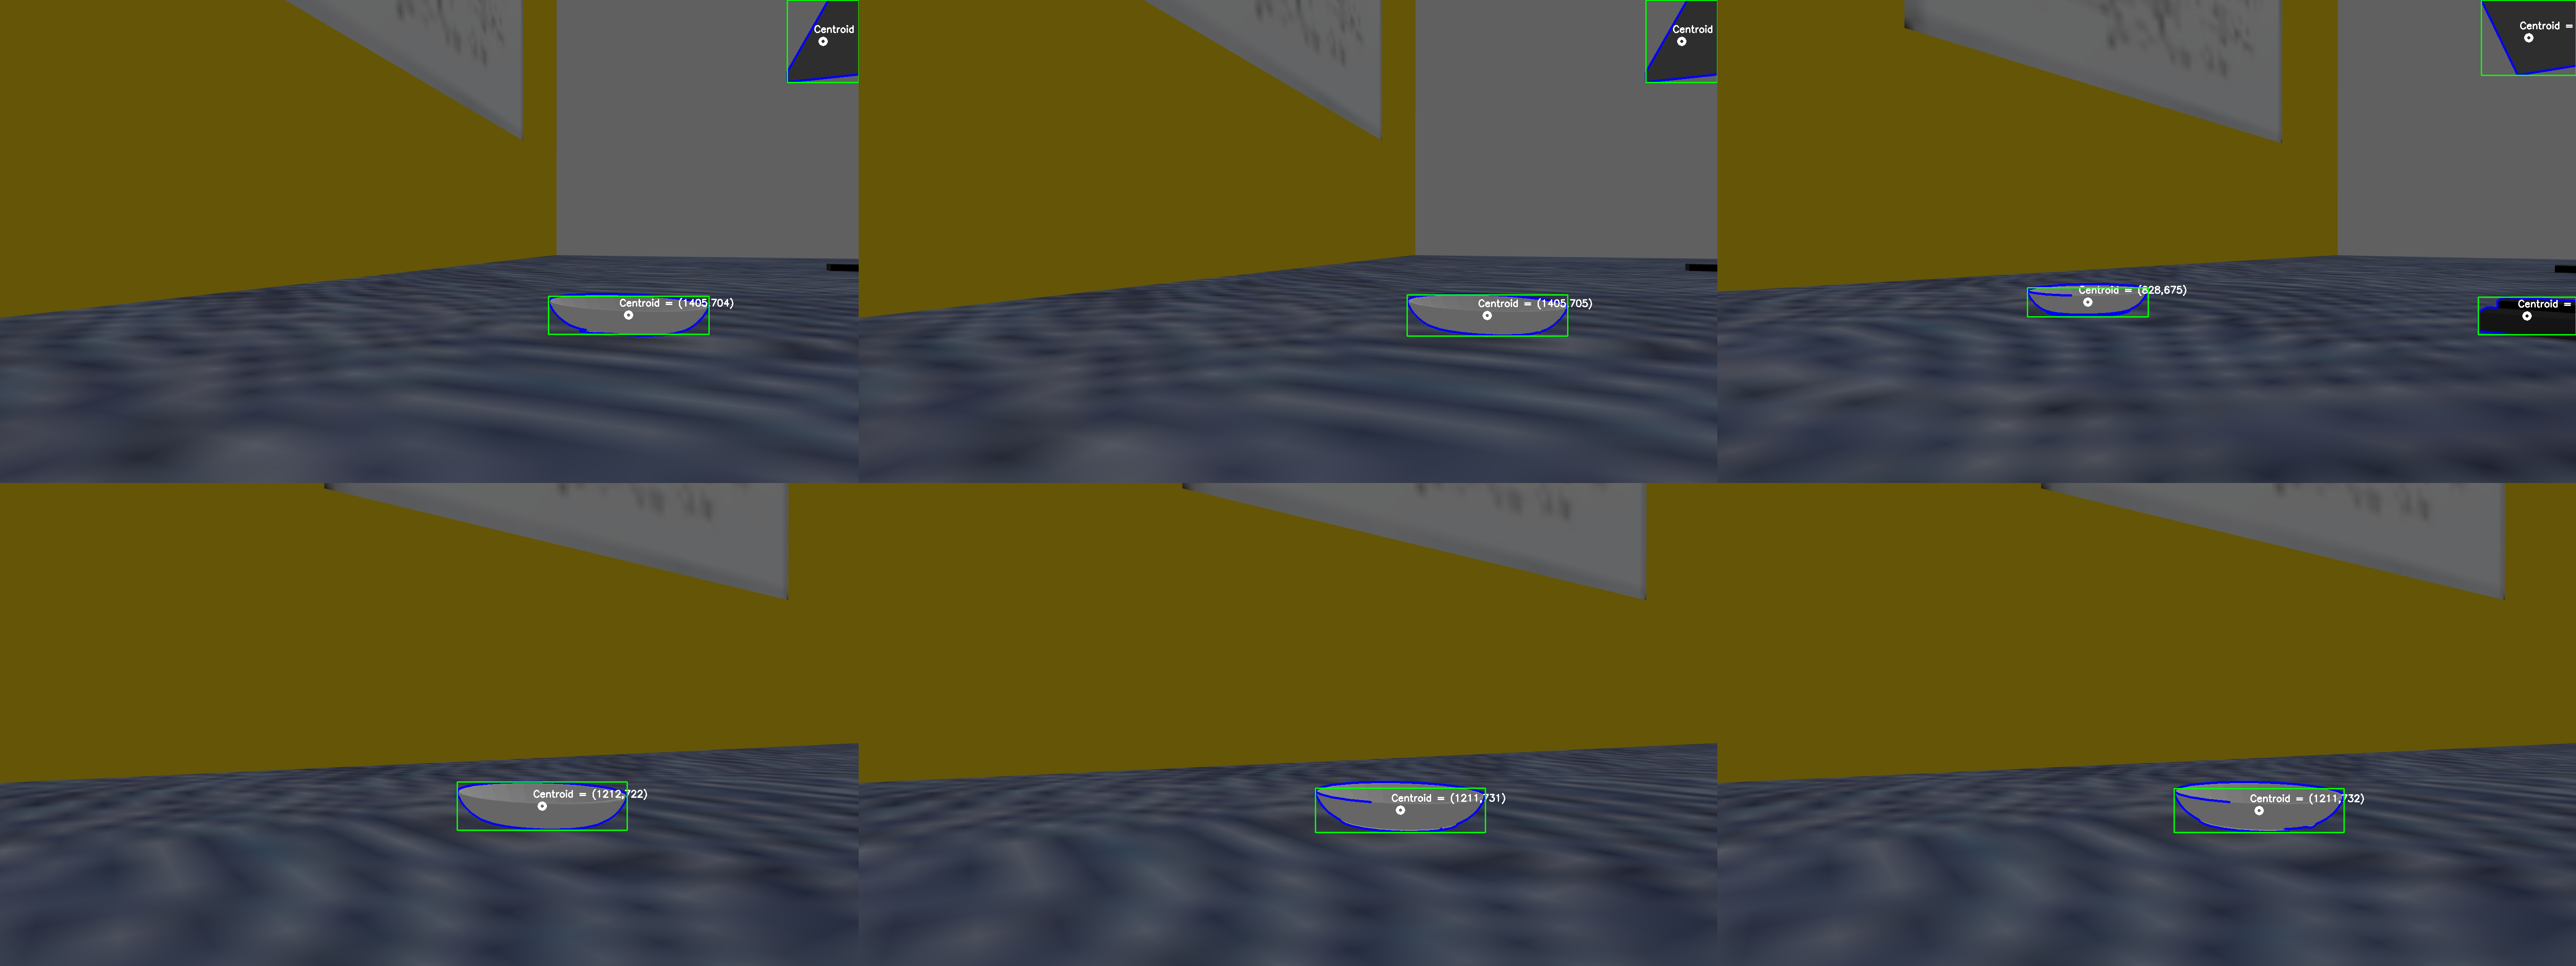

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

def getContours(img,imgContour,i):
    print("Image"+str(i)+"\n\n")
    print("Image Shape: ",img.shape)
    

    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
    imgCanny = cv2.Canny(imgBlur,50,50)
    img=imgCanny
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>20:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            cv2.circle(imgContour,(int(x+w/2),int(y+h/2)),7,(255,255,255),5)
            text="Centroid = ("+str(int(x+w/2))+","+str(int(y+h/2))+")"
            print(text)
            cv2.putText(imgContour, text, (int(x+w/2+-20),int(y+h/2+-20)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)



            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
    print("\n\n\n")
            




path1 = '/content/drive/MyDrive/Sample Images/b1.jpg'
path2 = '/content/drive/MyDrive/Sample Images/b2.jpg'
path3 = '/content/drive/MyDrive/Sample Images/b3.jpg'
path4 = '/content/drive/MyDrive/Sample Images/b4.jpg'
path5 = '/content/drive/MyDrive/Sample Images/b5.jpg'
path6 = '/content/drive/MyDrive/Sample Images/b6.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)
img6 = cv2.imread(path6)
imgContour1 = img1.copy()
imgContour2 = img2.copy()
imgContour3 = img3.copy()
imgContour4 = img4.copy()
imgContour5 = img5.copy()
imgContour6 = img6.copy()

getContours(img1,imgContour1,1)
getContours(img2,imgContour2,2)
getContours(img3,imgContour3,3)
getContours(img4,imgContour4,4)
getContours(img5,imgContour5,5)
getContours(img6,imgContour6,6)

imgBlank = np.zeros_like(img)
imgStack = stackImages(1,([imgContour1,imgContour2,imgContour3],
                            [imgContour4,imgContour5,imgContour6]))

cv2_imshow(imgStack)

cv2.waitKey(0)